In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from typing import Tuple, List
import math

# Benchmark

In [2]:
import numpy as np


class Benchmark:
    @staticmethod
    def get_function(dimension: int, function_id: int) -> tuple:
        return Benchmark.get_params(dimension, function_id)

    def get_params(dimension: int, function_id: int) -> tuple[int, float, float, float]:
        """
        Get params of a function

        Args:
            dimension: the number of dimension default equals to dimension
            function_id: the id of a function

        Returns:
            Returns the number of variables (int), upper bound value (float),  lower_bound value (float), and function treshold of fx (float)

        Raises:
            ValueError: function_id not found
        """
        n_var = dimension
        match (function_id):
            case 1:
                ub = 100.0
                lb = -100.0
                min_val = 0.0
            case 2:
                ub = 10.0
                lb = -10.0
                min_val = 0.0
            case 3:
                ub = 100.0
                lb = -100.0
                min_val = 0.0
            case 4:
                ub = 100.0
                lb = -100.0
                min_val = 0.0
            case 5:
                ub = 30.0
                lb = -30.0
                min_val = 0.0
            case 6:
                ub = 100.0
                lb = -100.0
                min_val = 0.0
            case 7:
                ub = 1.28
                lb = -1.28
                min_val = 0.0
            case 8:
                ub = 500.0
                lb = -500.0
                min_val = -418.9829 * n_var
            case 9:
                ub = 5.12
                lb = -5.12
                min_val = 0.0
            case 10:
                ub = 32.0
                lb = -32.0
                min_val = 0.0
            case 11:
                ub = 600.0
                lb = -600.0
                min_val = 0.0
            case 12:
                ub = 50.0
                lb = -50.0
                min_val = 0.0
            case 13:
                ub = 50.0
                lb = -50.0
                min_val = 0.0
            case 14:
                n_var = 2
                ub = 65.0
                lb = -65.0
                min_val = 0.998
            case 15:
                n_var = 4
                ub = 5.0
                lb = -5.0
                min_val = 0.0003
            case 16:
                n_var = 2
                ub = 5.0
                lb = -5.0
                min_val = -1.0316
            case 17:
                n_var = 2
                ub = 5.0
                lb = -5.0
                min_val = 0.398
            case 18:
                n_var = 2
                ub = 2.0
                lb = -2.0
                min_val = 3.0
            case 19:
                n_var = 3
                ub = 1.0
                lb = 0.0
                min_val = -3.86
            case 20:
                n_var = 6
                ub = 1.0
                lb = 0.0
                min_val = -3.32
            case 21:
                n_var = 4
                ub = 10.0
                lb = 0.0
                min_val = -10.1532
            case 22:
                n_var = 4
                ub = 10.0
                lb = 0.0
                min_val = -10.4029
            case 23:
                n_var = 4
                ub = 10.0
                lb = 0.0
                min_val = -10.5364
            case _:
                # default
                raise ValueError(f"Function ID {function_id} not implemented")

        return n_var, ub, lb, min_val

    @staticmethod
    def evaluate(x: np.ndarray, function_id: int) -> float:
        """
        Evaluate the komodo individual on the given function

        Args:
            x: Komodo individual consists of numpy array with a shape of ((n_var))
            function_id: the id of a function to be evaluated

        Returns:
            Returns function_id evaluation result (float)

        Raises:
            ValueError: function_id not found
            IndexOutOfRange
            DivideByZero
        """

        if x.ndim != 2 and x.shape[0] != 1:
            x = x.reshape(1, -1)
            if x.ndim != 2 and x.shape[0] != 1:
                raise Exception("Shape of the array X is not (1,n_var)")

        dim = x.shape[1]

        match (function_id):
            case 1:
                # Sphere function
                return np.sum(x**2)
            case 2:
                # Schwefel 2.22
                return np.sum(np.abs(x)) + np.prod(np.abs(x))
            case 3:
                # Schwefel 1.2
                fx = 0
                dimTemp = len(x) + 1
                for i in range(1, dimTemp):
                    fx += np.sum(np.power(x[0:i], 2))
                return fx
            case 4:
                # Schwefel 2.21
                return np.max(np.abs(x))
            case 5:
                # Rosenbrock
                x = np.squeeze(x)
                result = np.sum(
                    100 * (x[1:dim] - (x[0 : dim - 1] ** 2)) ** 2
                    + (x[0 : dim - 1] - 1) ** 2
                )
                return result
            case 6:
                # Step
                return np.sum(np.floor(x + 0.5) ** 2)
            case 7:
                # Quartic
                return np.sum(np.arange(1, dim + 1) * x**4) + np.random.rand()
            case 8:
                # Schwefel
                return np.sum(-x * np.sin(np.sqrt(np.abs(x))))
            case 9:
                # Rastrigin
                return np.sum(x**2 - 10 * np.cos(2 * np.pi * x)) + 10 * dim
            case 10:
                # Ackley
                result = (
                    -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / dim))
                    - np.exp(np.sum(np.cos(2 * np.pi * x)) / dim)
                    + 20
                    + np.exp(1)
                )

                if result == 0:
                    print(error)

                return result
            case 11:
                # Griewank
                return (
                    np.sum(x**2) / 4000
                    - np.prod(np.cos(x / np.sqrt(np.arange(1, dim + 1))))
                    + 1
                )
            case 12:
                # Penalized
                x = np.squeeze(x)
                a, k, m = 10, 100, 4
                dim = len(x)  # Dimension of the input vector

                # Transform the input vector x
                y = 1 + (x + 1) / 4

                # First term of the function
                first_term = (np.pi / dim) * (
                    10 * np.sin(np.pi * y[0]) ** 2
                    + np.sum((y[:-1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * y[1:]) ** 2))
                    + (y[-1] - 1) ** 2
                )

                # Penalty term
                penalty = np.sum(
                    k * ((x - a) ** m) * (x > a) + k * ((-x - a) ** m) * (x < -a)
                )

                # Final function value
                fx = first_term + penalty

                return fx

            case 13:
                # Penalized2
                x = x.copy()
                if x.ndim == 1:
                    x = x.reshape(1, -1)
                a = 5
                k = 100
                m = 4
                return 0.1 * (
                    (np.sin(3 * np.pi * x[:, 0])) ** 2
                    + np.sum(
                        ((x[:, :-1] - 1) ** 2)
                        * (1 + (np.sin(3 * np.pi * x[:, 1:])) ** 2),
                        axis=1,
                    )
                    + ((x[:, -1] - 1) ** 2) * (1 + (np.sin(2 * np.pi * x[:, -1])) ** 2)
                ) + np.sum(
                    k * ((x - a) ** m) * (x > a) + k * ((-x - a) ** m) * (x < (-a))
                )

            case 14:
                # Foxholes
                a = np.array(
                    [
                        [
                            -32,
                            -16,
                            0,
                            16,
                            32,
                            -32,
                            -16,
                            0,
                            16,
                            32,
                            -32,
                            -16,
                            0,
                            16,
                            32,
                            -32,
                            -16,
                            0,
                            16,
                            32,
                            -32,
                            -16,
                            0,
                            16,
                            32,
                        ],
                        [
                            -32,
                            -32,
                            -32,
                            -32,
                            -32,
                            -16,
                            -16,
                            -16,
                            -16,
                            -16,
                            0,
                            0,
                            0,
                            0,
                            0,
                            16,
                            16,
                            16,
                            16,
                            16,
                            32,
                            32,
                            32,
                            32,
                            32,
                        ],
                    ]
                )
                b = np.sum((x.reshape(-1, 1) - a) ** 6, axis=0)
                return (1 / 500 + np.sum(1 / (np.arange(1, 26) + b))) ** (-1)

            case 15:
                # Kowalik
                x = np.squeeze(x)
                a = np.array(
                    [
                        0.1957,
                        0.1947,
                        0.1735,
                        0.16,
                        0.0844,
                        0.0627,
                        0.0456,
                        0.0342,
                        0.0323,
                        0.0235,
                        0.0246,
                    ]
                )
                b = 1 / np.array([0.25, 0.5, 1, 2, 4, 6, 8, 10, 12, 14, 16])
                if dim == 2:
                    return np.sum((a - (x[0] * (b**2 + x[1] * b))))
                else:
                    return np.sum(
                        (a - ((x[0] * (b**2 + x[1] * b)) / (b**2 + x[2] * b + x[3])))
                        ** 2
                    )

            case 16:
                # Six Hump Camel
                x = np.squeeze(x)
                return (
                    4 * x[0] ** 2
                    - 2.1 * x[0] ** 4
                    + (x[0] ** 6) / 3
                    + x[0] * x[1]
                    - 4 * x[1] ** 2
                    + 4 * x[1] ** 4
                )

            case 17:
                # Branin
                x = np.squeeze(x)
                return (
                    (x[1] - (x[0] ** 2) * 5.1 / (4 * (np.pi**2)) + 5 / np.pi * x[0] - 6)
                    ** 2
                    + 10 * (1 - 1 / (8 * np.pi)) * np.cos(x[0])
                    + 10
                )

            case 18:
                # GoldStein-Price
                x = np.squeeze(x)
                return (
                    1
                    + (x[0] + x[1] + 1) ** 2
                    * (
                        19
                        - 14 * x[0]
                        + 3 * (x[0] ** 2)
                        - 14 * x[1]
                        + 6 * x[0] * x[1]
                        + 3 * x[1] ** 2
                    )
                ) * (
                    30
                    + (2 * x[0] - 3 * x[1]) ** 2
                    * (
                        18
                        - 32 * x[0]
                        + 12 * (x[0] ** 2)
                        + 48 * x[1]
                        - 36 * x[0] * x[1]
                        + 27 * (x[1] ** 2)
                    )
                )

            case 19:
                x = np.squeeze(x)
                # Hartman 3
                a = np.array([[3, 10, 30], [0.1, 10, 35], [3, 10, 30], [0.1, 10, 35]])
                c = np.array([1, 1.2, 3, 3.2])
                p = np.array(
                    [
                        [0.3689, 0.117, 0.2673],
                        [0.4699, 0.4387, 0.747],
                        [0.1091, 0.8732, 0.5547],
                        [0.03815, 0.5743, 0.8828],
                    ]
                )
                if dim == 2:
                    return -np.sum(
                        c * np.exp(-np.sum(a[:, :2] * ((x - p[:, :2]) ** 2), axis=1))
                    )
                else:
                    return -np.sum(c * np.exp(-np.sum(a * ((x - p) ** 2), axis=1)))

            case 20:
                # Hartman 6
                x = np.squeeze(x)
                af = np.array(
                    [
                        [10, 3, 17, 3.5, 1.7, 8],
                        [0.05, 10, 17, 0.1, 8, 14],
                        [3, 3.5, 1.7, 10, 17, 8],
                        [17, 8, 0.05, 10, 0.1, 14],
                    ]
                )
                cf = np.array([1, 1.2, 3, 3.2])
                pf = np.array(
                    [
                        [0.1312, 0.1696, 0.5569, 0.0124, 0.8283, 0.5886],
                        [0.2329, 0.4135, 0.8307, 0.3736, 0.1004, 0.9991],
                        [0.2348, 0.1415, 0.3522, 0.2883, 0.3047, 0.6650],
                        [0.4047, 0.8828, 0.8732, 0.5743, 0.1091, 0.0381],
                    ]
                )
                if dim == 2:
                    return -np.sum(
                        cf * np.exp(-np.sum(af[:, :2] * ((x - pf[:, :2]) ** 2), axis=1))
                    )
                else:
                    return -np.sum(cf * np.exp(-np.sum(af * ((x - pf) ** 2), axis=1)))

            case 21:
                x = np.squeeze(x)
                # shekel 5
                a = np.array(
                    [
                        [4, 4, 4, 4],
                        [1, 1, 1, 1],
                        [8, 8, 8, 8],
                        [6, 6, 6, 6],
                        [3, 7, 3, 7],
                        [2, 9, 2, 9],
                        [5, 5, 3, 3],
                        [8, 1, 8, 1],
                        [6, 2, 6, 2],
                        [7, 3.6, 7, 3.6],
                    ]
                )
                c = np.array([0.1, 0.2, 0.2, 0.4, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5])
                m = 5
                if dim == 2:
                    return -np.sum(1 / (np.sum((x - a[:m, :2]) ** 2, axis=1) + c[:m]))
                else:
                    return -np.sum(1 / (np.sum((x - a[:m]) ** 2, axis=1) + c[:m]))

            case 22:
                x = np.squeeze(x)
                # shekel 7
                a = np.array(
                    [
                        [4, 4, 4, 4],
                        [1, 1, 1, 1],
                        [8, 8, 8, 8],
                        [6, 6, 6, 6],
                        [3, 7, 3, 7],
                        [2, 9, 2, 9],
                        [5, 5, 3, 3],
                        [8, 1, 8, 1],
                        [6, 2, 6, 2],
                        [7, 3.6, 7, 3.6],
                    ]
                )
                c = np.array([0.1, 0.2, 0.2, 0.4, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5])
                m = 7
                if dim == 2:
                    return -np.sum(1 / (np.sum((x - a[:m, :2]) ** 2, axis=1) + c[:m]))
                else:
                    return -np.sum(1 / (np.sum((x - a[:m]) ** 2, axis=1) + c[:m]))
            case 23:
                x = np.squeeze(x)
                # shekel 10
                a = np.array(
                    [
                        [4, 4, 4, 4],
                        [1, 1, 1, 1],
                        [8, 8, 8, 8],
                        [6, 6, 6, 6],
                        [3, 7, 3, 7],
                        [2, 9, 2, 9],
                        [5, 5, 3, 3],
                        [8, 1, 8, 1],
                        [6, 2, 6, 2],
                        [7, 3.6, 7, 3.6],
                    ]
                )
                c = np.array([0.1, 0.2, 0.2, 0.4, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5])
                m = 10
                if dim == 2:
                    return -np.sum(1 / (np.sum((x - a[:m, :2]) ** 2, axis=1) + c[:m]))
                else:
                    return -np.sum(1 / (np.sum((x - a[:m]) ** 2, axis=1) + c[:m]))

            case _:
                raise ValueError(f"Function ID {function_id} not implemented")


# KMA Algorithm

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from src.algorithms.kma_algorithm import KMA


class KMADriver:
    def __init__(
        self, function_id: int, dimension: int, max_num_eva: int, pop_size: int
    ):
        self.function_id = function_id
        self.dimension = dimension
        self.max_num_eva = max_num_eva
        self.pop_size = pop_size
        self.kma = KMA(function_id, dimension, max_num_eva, pop_size)

    def run(self):
        best_indiv, opt_val, num_eva, fopt, fmean, proc_time, evo_pop_size = (
            self.kma.run()
        )
        self.report_results(best_indiv, opt_val, num_eva, proc_time)
        self.visualize_convergence(fopt, fmean)
        self.visualize_log_convergence(fopt, fmean)
        self.visualize_population_size(evo_pop_size)

    def report_results(self, best_indiv, opt_val, num_eva, proc_time):
        print(f"Function              = F{self.function_id}")
        print(f"Dimension             = {self.dimension}")
        print(f"Number of evaluations = {num_eva}")
        print(f"Processing time (sec) = {proc_time:.10f}")
        print(f"Global optimum        = {self.kma.fthreshold_fx:.10f}")
        print(f"Actual solution       = {opt_val}")
        print(f"Best individual       = {best_indiv}")

    def visualize_convergence(self, fopt, fmean):
        plt.figure(figsize=(10, 6))
        plt.plot(fopt, "r-", label="Best fitness")
        plt.plot(fmean, "b--", label="Mean fitness")
        plt.title(f"Convergence curve of Function F{self.function_id}")
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.legend()
        plt.show()

    def visualize_log_convergence(self, fopt, fmean):
        if fopt[-1] >= 0:
            plt.figure(figsize=(10, 6))
            plt.plot(np.log10(fopt), "r-", label="Best fitness")
            plt.plot(np.log10(fmean), "b--", label="Mean fitness")
            plt.title(f"Log convergence curve of Function F{self.function_id}")
            plt.xlabel("Generation")
            plt.ylabel("Log Fitness")
            plt.legend()
            plt.show()

    def visualize_population_size(self, evo_pop_size):
        plt.figure(figsize=(10, 6))
        plt.plot(evo_pop_size)
        plt.axis([1, len(evo_pop_size), 0, self.kma.max_ada_pop_size + 5])
        plt.title(
            f"Fixed and self-adaptive population size for Function F{self.function_id}"
        )
        plt.xlabel("Generation")
        plt.ylabel("Population size (Number of individuals)")
        plt.show()


if __name__ == "__main__":
    function_id = 16
    dimension = 50
    max_num_eva = 25000
    pop_size = 5

    driver = KMADriver(function_id, dimension, max_num_eva, pop_size)
    driver.run()


# Driver

Function              = F16
Dimension             = 50
Number of evaluations = 2755
Processing time (sec) = 0.0000000000
Global optimum        = -1.0316000000
Actual solution       = -1.0316260658
Best individual       = [-0.09062715  0.71272524]


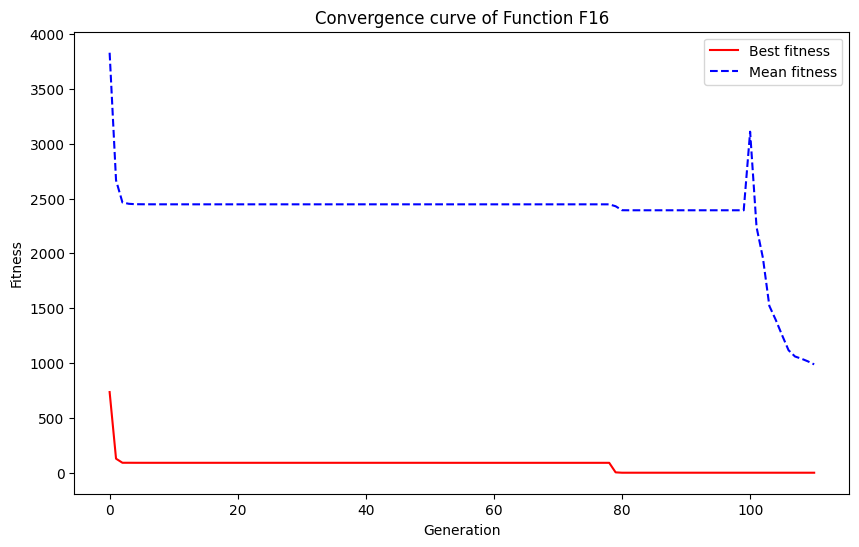

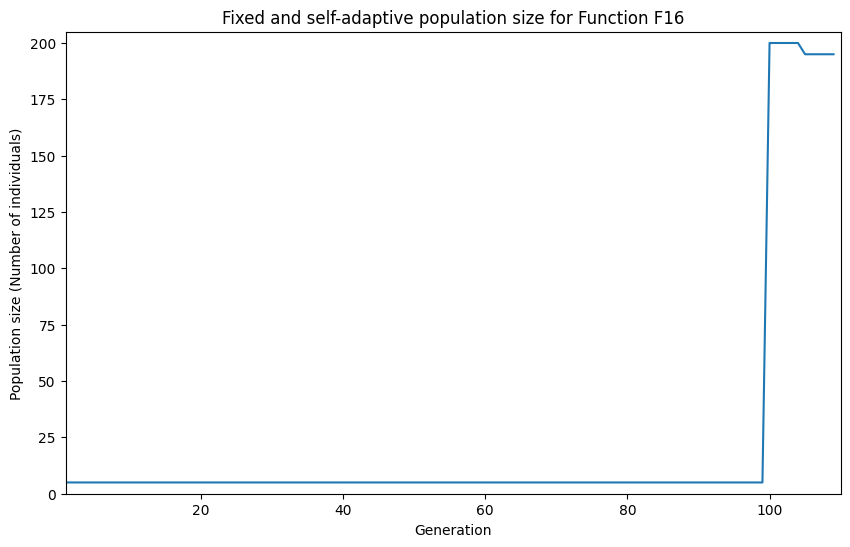

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from src.algorithms.kma_algorithm import KMA


class KMADriver:
    def __init__(
        self, function_id: int, dimension: int, max_num_eva: int, pop_size: int
    ):
        self.function_id = function_id
        self.dimension = dimension
        self.max_num_eva = max_num_eva
        self.pop_size = pop_size
        self.kma = KMA(function_id, dimension, max_num_eva, pop_size)

    def run(self):
        best_indiv, opt_val, num_eva, fopt, fmean, proc_time, evo_pop_size = (
            self.kma.run()
        )
        self.report_results(best_indiv, opt_val, num_eva, proc_time)
        self.visualize_convergence(fopt, fmean)
        self.visualize_log_convergence(fopt, fmean)
        self.visualize_population_size(evo_pop_size)

    def report_results(self, best_indiv, opt_val, num_eva, proc_time):
        print(f"Function              = F{self.function_id}")
        print(f"Dimension             = {self.dimension}")
        print(f"Number of evaluations = {num_eva}")
        print(f"Processing time (sec) = {proc_time:.10f}")
        print(f"Global optimum        = {self.kma.fthreshold_fx:.10f}")
        print(f"Actual solution       = {opt_val}")
        print(f"Best individual       = {best_indiv}")

    def visualize_convergence(self, fopt, fmean):
        plt.figure(figsize=(10, 6))
        plt.plot(fopt, "r-", label="Best fitness")
        plt.plot(fmean, "b--", label="Mean fitness")
        plt.title(f"Convergence curve of Function F{self.function_id}")
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.legend()
        plt.show()

    def visualize_log_convergence(self, fopt, fmean):
        if fopt[-1] >= 0:
            plt.figure(figsize=(10, 6))
            plt.plot(np.log10(fopt), "r-", label="Best fitness")
            plt.plot(np.log10(fmean), "b--", label="Mean fitness")
            plt.title(f"Log convergence curve of Function F{self.function_id}")
            plt.xlabel("Generation")
            plt.ylabel("Log Fitness")
            plt.legend()
            plt.show()

    def visualize_population_size(self, evo_pop_size):
        plt.figure(figsize=(10, 6))
        plt.plot(evo_pop_size)
        plt.axis([1, len(evo_pop_size), 0, self.kma.max_ada_pop_size + 5])
        plt.title(
            f"Fixed and self-adaptive population size for Function F{self.function_id}"
        )
        plt.xlabel("Generation")
        plt.ylabel("Population size (Number of individuals)")
        plt.show()


if __name__ == "__main__":
    function_id = 16
    dimension = 50
    max_num_eva = 25000
    pop_size = 5

    driver = KMADriver(function_id, dimension, max_num_eva, pop_size)
    driver.run()
